## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

Corresponding with this notebook is a slide deck where you will need to update all the portions in red.  Completing the notebook will provide all the results needed for the slides.  **Correctly completing the slides is a required part of the project.**

## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Probability](#probability)
- [Part III - Experimentation](#experimentation)
- [Part IV - Algorithms](#algorithms)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [43]:
import pandas as pd
import numpy as np
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(0)

`1.a)` Now, reading in the `ab_data.csv` data. We store it in `df`. Reading in the dataset now, we take a look at the top few rows here.

In [44]:
df = pd.read_csv('ab_data.csv')
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69889 entries, 0 to 69888
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    69889 non-null  object
 1   group      69889 non-null  object
 2   converted  69889 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


`b)` Using the below cells, we find different infos in the dataset.

In [46]:
#This is the full shape of the dataset

df.shape

(69889, 3)

In [47]:
#Rows now, we have 

df.shape[0]

69889

`c)` The proportion of users converted are:

In [48]:
df['converted'].mean()

0.13047832992316388

`d)` Do any of the rows have missing values here?

In [49]:
df.isna().sum()

country      0
group        0
converted    0
dtype: int64

`e)` How many customers are from each country? Build a bar chart to show the count of visits from each country.

In [50]:
#doing a simple value count

df['country'].value_counts()

US    48850
UK    17551
CA     3488
Name: country, dtype: int64

In [51]:
# number of visitors from each country - pull the necessary code from the next cell to provide just the counts

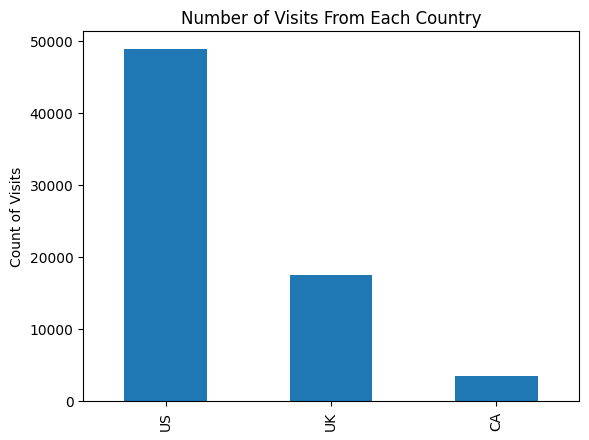

In [52]:
# bar chart of results
df['country'].value_counts().plot(kind='bar');
plt.title('Number of Visits From Each Country');
plt.ylabel('Count of Visits');
plt.show();

`f)` Recognize that all of our columns are of a **categorical data type** with the exception of one.  Which column is not **categorical**? 

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69889 entries, 0 to 69888
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    69889 non-null  object
 1   group      69889 non-null  object
 2   converted  69889 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [54]:
#investigating just the Numeric, converted column:

df.select_dtypes(include=['number'])

,converted
0,0
1,1
2,0
3,0
4,0
...,...
69884,0
69885,0
69886,0
69887,0


`g)` What are the possible values of the `converted` column?  Does it make sense that these values are the only possible values? Why or why not? 


In [55]:
df['converted'].value_counts()

0    60770
1     9119
Name: converted, dtype: int64

The values of converted are 0 and 1, denoting 0 for not being converted, and 1 for a conversion, as they should be 

<a id='probability'></a>
#### Part II - Probability

`1.` Now that we have had a chance to learn more about the dataset, let's look more at how different factors are related to `converting`.

`a)` What is the probability of an individual converting regardless of the page they receive or the country they are from? Simply, what is the chance of conversion in the dataset?

In [56]:
df['group'].value_counts()/df['group'].shape[0]

treatment    0.503813
control      0.496187
Name: group, dtype: float64

In [57]:
df.query('country=="UK"')['converted'].mean()

0.12512107572218106

In [58]:
df.query('country=="US"')['converted'].mean()

0.13277379733879222

In [59]:
df['converted'].mean() 

0.13047832992316388

`b)` Given that an individual was in the `control` group, what is the probability they converted? 

In [60]:
df.query('group == "control"')['converted'].mean()

0.1052540515600669

`c)` Given that an individual was in the `treatment` group, what is the probability they converted?

In [61]:
df.query('group == "treatment"')['converted'].mean()

0.15532078043793132

`d)` Do we see evidence that the treatment is related to higher `converted` rates?

In [62]:
df[df['group']=='treatment']['converted'].value_counts()

0    29742
1     5469
Name: converted, dtype: int64

In [63]:
df[df['group']=='control']['converted'].value_counts()

0    31028
1     3650
Name: converted, dtype: int64

`e)` What is the probability that an individual was in the `treatment`?

In [64]:
df.query('group == "treatment"').count()[0]/df['group'].shape[0]

0.5038131894861853

`f)` What is the probability that an individual was from Canada `CA`?

In [65]:
df['country'].value_counts()

US    48850
UK    17551
CA     3488
Name: country, dtype: int64

In [66]:
df[df['country']=='CA'].shape[0] / df.shape[0]


0.04990771079855199

In [67]:
df[df['country']=='UK'].shape[0] / df.shape[0]

#the probability someone is from the UK

0.25112678676186523

In [68]:
df[df['country']=='US'].shape[0] / df.shape[0]

#the probability someone is from the US

0.6989655024395828

`g)` Given that an individual was in the `US`, what was the probability that they `converted`? 

$P(\text{converted} == 1|\text{country} ==\text{"US"})$



In [69]:
df.query('country == "US"')['converted'].mean()

0.13277379733879222

`h)` Given that an individual was in the `UK`, what was the probability that they `converted`? 

$P(\text{converted} == 1|\text{country} ==\text{"UK"})$

In [70]:
df.query('country=="UK"')['converted'].mean()

0.12512107572218106

 Given that an individual was in `CA`, what was the probability that they `converted`?

In [71]:
df.query('country=="CA"')['converted'].mean()

0.1252866972477064

`i)` Do we see evidence that the `converted` rate might differ from one country to the next?

**Although MINIMAL(especially between UK and Canada) there is a slight conversion rate between these countries.**

`j)` In the table below, we attempt to fill in the conversion rates below to look at how conversion by country and treatment group vary.  


In [72]:
print(df.query('country == "US" and group == "control" and converted == 1').shape[0]/df.query('country == "US" and group == "control"').shape[0]) 
print(df.query('country == "US" and group == "treatment" and converted == 1').shape[0]/df.query('country == "US" and group == "treatment"').shape[0])

0.10731404958677686
0.1577687626774848


In [73]:
df.query('country == "US"').groupby('group')['converted'].mean()

group
control      0.107314
treatment    0.157769
Name: converted, dtype: float64

In [74]:
print(df.query('converted == 1 and country == "UK" and group == "control"').shape[0]/df.query('country == "UK" and group == "control"').shape[0] )
print(df.query('converted == 1 and country == "UK" and group == "treatment"').shape[0]/df.query('country == "UK" and group == "treatment"').shape[0]) 


0.10164866401364411
0.148698035632709


In [75]:
print(df.query('converted == 1 and country == "CA" and group == "control"').shape[0]/df.query('country == "CA" and group == "control"').shape[0] )
print(df.query('converted == 1 and country == "CA" and group == "treatment"').shape[0]/df.query('country == "CA" and group == "treatment"').shape[0]) 


0.0944741532976827
0.15401662049861495


##### Complete truth Table

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  10.16%     |  9.44%      |
| Treatment   | 15.8%       |  14.87%     | 15.40%      |

<a id='experimentation'></a>
### Part III - Experimentation

`1.` Consider we need to make the decision just based on all the data provided.  

If you want to assume that the control page is better unless the treatment page proves to be definitely better at a Type I error rate of 5%, you state your null and alternative hypotheses in terms of **$p_{control}$** and **$p_{treatment}$** as:  

Which is equivalent to:

$H_{0}: p_{treatment} - p_{control} <= 0$

$H_{1}: p_{treatment} - p_{control} > 0$

and 

$H_{0}: p_{treatment} <= p_{control}$

$H_{1}: p_{treatment} > p_{control}$

Where  
* **$p_{control}$** is the `converted` rate for the control page
* **$p_{treatment}$** `converted` rate for the treatment page



**NOTE: FOR THIS EXPERIMENT WE ARE NOT LOOKING AT DIFFERENCES ASSOCIATED WITH COUNTRIES.**

Assume under the null hypothesis, $p_{treatment}$ and $p_{control}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{treatment}$ and $p_{control}$ are equal. 

Furthermore, assume they are equal to the **converted** rate in `df` regardless of the page. **These are set in the first cell below.**<br><br>

* Using a sample size for each page equal to the ones in `df`. **These are also set below.**  <br><br>

* Perform the sampling distribution for the difference in `converted` between the two pages over 500 iterations of calculating an estimate from the null.  <br><br>

* Use the cells below to provide the necessary parts of this simulation.  <br><br>


In [76]:
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


`a)` The **convert rate** for $p_{treatment}$ under the null.  The **convert rate** for $p_{control}$ under the null. The sample size for the `control` and the sample size for the `treatment` are from the original dataset. **All of these values are set below, and set the stage for the simulations we will run for the rest of this section.**

In [77]:
p_control_treatment_null  = df.query('converted==1')['converted'].sum()/df['converted'].shape[0]
n_treatment = df.query('group == "treatment"').shape[0]
n_control = df.query('group == "control"').shape[0]

In [78]:
print(n_treatment)
print(n_control)

35211
34678


In [79]:
p_control_treatment_null

0.13047832992316388

###### Under the null hypothesis, both p_control_null and p_treatment_null are assumed to be equal to the overall conversion rate observed in the dataset.

`b)` Using the results from part `a)` to simulate `n_treatment` transactions with a convert rate of `p_treatment_null`.  We store these $n_{treatment}$ 1's and 0's in a `list` of **treatment_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be the same): 

`[0, 0, 1, 1, 0, ....]` 

In [80]:
treatment_converted =  np.random.choice([0, 1], size=n_treatment, p=[p_control_treatment_null,1-p_control_treatment_null])

`c)` Using the results from part `a)` to simulate `n_control` transactions with a convert rate of `p_control_null`.  We store these $n_{treatment}$ 1's and 0's in a `list` of **control_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be exactly the same): 

`[0, 0, 1, 1, 0, ....]` 

In [81]:
control_converted = np.random.choice([0, 1], size=n_control, p = [p_control_treatment_null, 1-p_control_treatment_null])

`d)` Find the estimate for $p_{treatment}$ - $p_{control}$ under the null using the simulated values from part `(b)` and `(c)`.

In [82]:
diff = treatment_converted.mean() - control_converted.mean()

In [84]:
diff

0.0005036374281981448

`e)` Simulate 500 $p_{treatment}$ - $p_{control}$ values using this same process as `b)`- `d)` similarly to the one you calculated in parts **a. through g.** above.  Store all 500 values in an numpy array called **p_diffs**.  This array should look similar to the below **(the values will not match AND this will likely take a bit of time to run)**:

`[0.001, -0.003, 0.002, ...]`

In [87]:
p_diffs = []

for _ in range(500): 
    
    # simulate the treatment and control converted arrays
    treatment_converted =  np.random.choice([0, 1], size=n_treatment, p = [p_control_treatment_null, 1-p_control_treatment_null]).mean()
    control_converted = np.random.choice([0, 1], size=n_control, p = [p_control_treatment_null, 1-p_control_treatment_null]).mean()
    
    # calculate p_treatment and p_control under the null
    # calculate the difference between p_treatment_null and p_control_null
    p_diff = treatment_converted - control_converted
    
    # add p_diff to the p_diffs array
    p_diffs.append(p_diff)
    

`f)` Plot a histogram of the **p_diffs**.

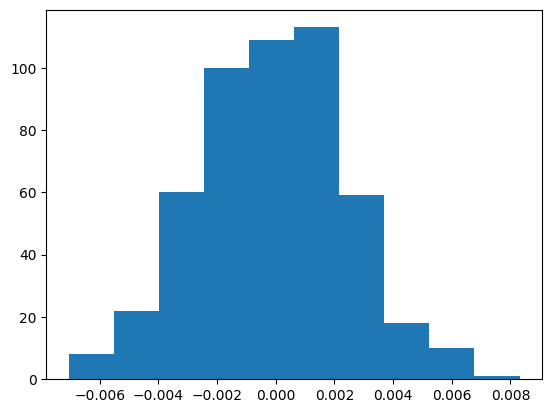

In [88]:
p_diffs = pd.Series(p_diffs)
plt.hist(p_diffs, bins=10);

`g)` What proportion of the **p_diffs** are greater than the difference observed between `treatment` and `control` in `df`?

In [89]:
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


In [96]:
#For treatment 

treatmnt = df.query('group=="treatment"')['converted'].mean() 

In [97]:
#For control

contrl = df.query('group=="control"')['converted'].mean()

In [98]:
actual_diffs = treatmnt - contrl

In [99]:
actual_diffs

0.050066728877864425

In [101]:
#Getting our p-value now

In [102]:
(p_diffs > actual_diffs).mean()

0.0

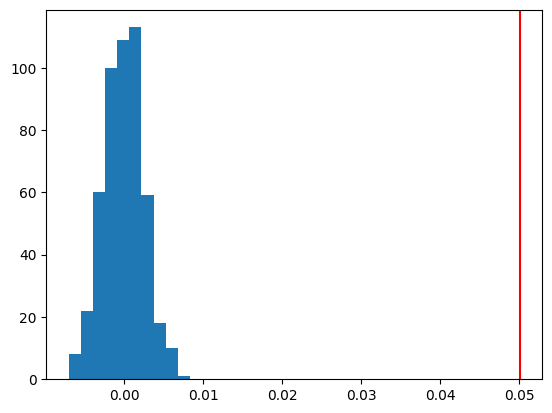

In [103]:
p_diffs = pd.Series(p_diffs)
plt.hist(p_diffs)
plt.axvline(actual_diffs, color='red');

`h)` What do we understand having using our Type I error rate of 0.05?

$H_{0}: p_{treatment} - p_{control} <= 0$

$H_{1}: p_{treatment} - p_{control} > 0$

**With a Type 1 error rate set at 0.05 and a p-value of 0.0, we should REJECT THE NULL HYPOTHESIS, indicating that the result is statistically significant. Additionally, the graph above shows that the red line does not fall within the null hypothesis, further supporting our decision to reject it.**

<a id='algorithms'></a>
### Part IV - Algorithms

`1.` In this final part, we will see that the result you acheived in the previous A/B test can also be acheived by performing regression. 

`a)` Since each row is either a conversion or no conversion, what type of regression should you be performing in this case? **Logistic Regression**

The goal here is to use **statsmodels** to fit the regression model we specified in part `a)` to see if there is a significant difference in conversion based on which page a customer receives.  

`b)` However, we first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [104]:
df['intercept'] = 1
df['ab_page'] = pd.get_dummies(df['group'])['treatment']
df.head()

,country,group,converted,intercept,ab_page
0,UK,control,0,1,0
1,US,treatment,1,1,1
2,UK,treatment,0,1,1
3,UK,control,0,1,0
4,UK,treatment,0,1,1


`c)`  Create your `X` matrix and `y` response column that will be passed to our model, where we are testing if there is a difference in `treatment` vs. `control`. 

In [105]:
X = df[['intercept', 'ab_page']]
y = df['converted']

`d)` Using **statsmodels** we fit our regression model on the `X` and `y` from part `c)`. 


In [106]:
# Logit Model
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.384516
         Iterations 6


`e)` Providing a summary of our model below:

In [107]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69887
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                0.007175
Time:                        20:56:43   Log-Likelihood:                -26873.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.810e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1402      0.017   -122.305      0.000      -2.174      -2.106
ab_page        0.4467      0.023     19.539      0.000       0.402       0.492


`f)` What is the p-value associated with **ab_page**? 

**The p_value for the ab_page, here too, has remained 0 here too**

`2. a)` Now we still want to create two new columns as dummy variables for `US` and `UK`.  Again, using `get_dummies` to add these columns.  The dataframe we create would include at least the following columns (If both columns for `US` and `UK` are `0` this represents `CA`.  The order of rows and columns is not important for us to match - it is just to illustrate how columns should connect to one another.):

##### Our Expected DataFrame
| intercept   | group       | ab_page     | converted   | country     |  US         | UK          |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  0          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  1          |  CA         |  0          |  0          |
| 1           |  treatment  |  1          |  1          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  1          |  US         |  1          |  0          |

In [108]:
#Create the necessary dummy variables

countries = pd.get_dummies(df['country'])
countries

,CA,UK,US
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
69884,0,1,0
69885,0,1,0
69886,0,1,0
69887,0,0,1


In [109]:
df = df.join(countries)

In [110]:
df = df.drop('CA', axis=1)

In [111]:
df

,country,group,converted,intercept,ab_page,UK,US
0,UK,control,0,1,0,1,0
1,US,treatment,1,1,1,0,1
2,UK,treatment,0,1,1,1,0
3,UK,control,0,1,0,1,0
4,UK,treatment,0,1,1,1,0
...,...,...,...,...,...,...,...
69884,UK,treatment,0,1,1,1,0
69885,UK,control,0,1,0,1,0
69886,UK,treatment,0,1,1,1,0
69887,US,control,0,1,0,0,1


`b)`  Creating our `X` matrix and `y` response column that will be passed to our model, where we are testing if there is 
* a difference in `converted` between `treatment` vs. `control`
* a difference in `converted` between `US`, `UK`, and `CA`

In [112]:
df

,country,group,converted,intercept,ab_page,UK,US
0,UK,control,0,1,0,1,0
1,US,treatment,1,1,1,0,1
2,UK,treatment,0,1,1,1,0
3,UK,control,0,1,0,1,0
4,UK,treatment,0,1,1,1,0
...,...,...,...,...,...,...,...
69884,UK,treatment,0,1,1,1,0
69885,UK,control,0,1,0,1,0
69886,UK,treatment,0,1,1,1,0
69887,US,control,0,1,0,0,1


In [113]:
X = df[['UK','US','intercept','ab_page']]
y = df['converted']

`c)` Again, using **statsmodels** to import and fit our regression model on the `X` and `y` from part `b)`. 

In [114]:
Logistic_model = sm.Logit(y, X)
fitting_model = Logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.384463
         Iterations 6


`d)` Providing the summary of our model below.

In [115]:
total_summary = fitting_model.summary()
total_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69885
Method:                           MLE   Df Model:                            3
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                0.007312
Time:                        20:59:38   Log-Likelihood:                -26870.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.778e-85
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
UK             0.0067      0.056      0.120      0.905      -0.103       0.117
US             0.0727      0.053      1.372      0.170      -0.031       0.177
intercept     -2.1930      0.053    -41.308      0.000      -2.297      -2.089
ab_page        0.4466      0.023     19.534      0.000       0.402       0.491
==============================================================================
"""

`e)` What do the `p-values` associated with `US` and `UK` suggest in relation to how they impact `converted`? 

**The p-values for both US and UK here are 0.905 and 0.170 respectfully. These two being higher than our significance levle of 0.05 meaning that we reject the null hypothesis if we were considering these**

**But remember, just as in the Experimentation aspect, the ab_page column has p-value of 0**